## 線形回帰の練習
- 参考サイト：https://toukei.link/programmingandsoftware/statistics_by_python/python_regression/

In [6]:
import os # ディレクトリを設定するためのライブラリ
import pandas as pd # Pythonでデータフレームを扱う（panda package）
import statsmodels.formula.api as sm # 回帰分析のライブラリ
import seaborn # 散布図に回帰直線を引くライブラリ

In [1]:
import os # ディレクトリを設定するためのライブラリ
import pandas as pd # Pythonでデータフレームを扱う（panda package）
import statsmodels as sm # 回帰分析のライブラリ
import seaborn # 散布図に回帰直線を引くライブラリ
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# CSV形式のデータを読み込む
mydata = pd.read_csv('data.csv')

<AxesSubplot:title={'center':'X2 vs Y'}, xlabel='X2', ylabel='Y'>

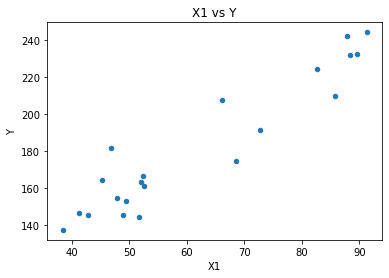

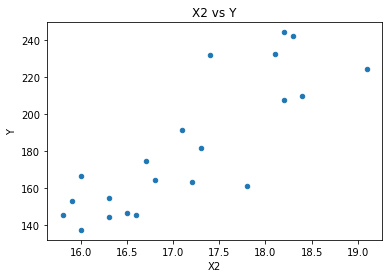

In [8]:
# pandasライブラリを利用して散布図を描く
mydata.plot.scatter(x='X1', y='Y', title='X1 vs Y')
mydata.plot.scatter(x='X2', y='Y', title='X2 vs Y')

### ◆単回帰分析
- 単回帰モデル1: $ Y = \beta_{0} + \beta_{1}X_{1} + \epsilon $

- 単回帰モデル2: $ Y = \beta_{0} + \beta_{1}X_{2} + \epsilon $

In [10]:
 # 単回帰モデル1
SLR1 = sm.ols(formula="Y ~ X1", data=mydata).fit()
print(SLR1.summary())
print()
# 単回帰モデル2
SLR2 = sm.ols(formula="Y ~ X2", data=mydata).fit()
print(SLR2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     157.2
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           1.23e-10
Time:                        13:35:40   Log-Likelihood:                -81.264
No. Observations:                  21   AIC:                             166.5
Df Residuals:                      19   BIC:                             168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.0454      9.462      7.191      0.0

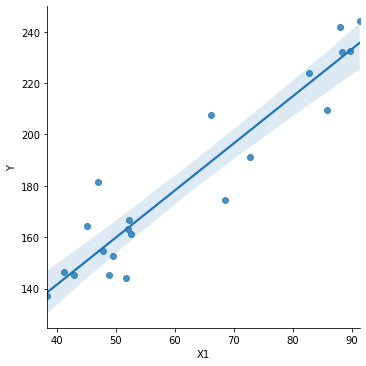

In [11]:
# 散布図に回帰直線を入れる
seaborn.lmplot(x='X1',y='Y',data=mydata,fit_reg=True) 

### 重回帰分析
- 重回帰モデル: $ Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \epsilon $

In [13]:
# 重回帰分析
MLR = sm.ols(formula="Y ~ X1 + X2", data=mydata).fit()
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     99.10
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           1.92e-10
Time:                        13:36:07   Log-Likelihood:                -78.549
No. Observations:                  21   AIC:                             163.1
Df Residuals:                      18   BIC:                             166.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.8571     60.017     -1.147      0.2

### 信頼区間をデフォルト(95%)から変更できるように調整

In [14]:
x = mydata['X1'].values
y = mydata['Y'].values

In [38]:
import statsmodels.api as sm

# Regression
X = sm.add_constant(x) # constant intercept term
 
# Model: y ~ a*x + c
model = sm.OLS(y, X)
fitted = model.fit()
x_pred = np.linspace(x.min(), x.max(), 50)
X_pred = sm.add_constant(x_pred)
y_pred = fitted.predict(X_pred)

In [39]:
#print(fitted.params)     # the estimated parameters for the regression line
print(fitted.summary())  # summary statistics for the regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     157.2
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           1.23e-10
Time:                        13:45:29   Log-Likelihood:                -81.264
No. Observations:                  21   AIC:                             166.5
Df Residuals:                      19   BIC:                             168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.0454      9.462      7.191      0.0

In [94]:
# Congfidence band
n_data = len(X)

y_hat = fitted.predict(X) 
y_err = y - y_hat
mean_x = np.mean(x)
dof = n_data - fitted.df_model - 1 # degree of freedom
alpha = 0.05 #有意水準を設定
t = stats.t.ppf(1-alpha, df=dof) # t-value
s_err = np.sum(y_err**2)
std_err = np.sqrt(s_err/(n_data-2))
std_x = np.std(x)
conf = t*std_err/np.sqrt(n_data)*np.sqrt(1+((x_pred-mean_x)/std_x)**2) 
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)

In [95]:
# # Congfidence band
# n_data = len(X)

# y_hat = fitted.predict(X) 
# y_err = y - y_hat
# mean_x = np.mean(x)
# dof = n_data - fitted.df_model - 1 # degree of freedom
# alpha = 0.05 #有意水準を設定
# t = stats.t.ppf(1-alpha, df=dof) # t-value
# s_err = np.sum(y_err**2)
# std_err = s_err/(n_data-2)
# std_x = np.std(x)
# conf = t*np.sqrt(std_err*((1/n_data)+((x_pred-mean_x)**2/(len(x_pred)*(x_pred-mean_x)**2))))
# upper = y_pred + abs(conf)
# lower = y_pred - abs(conf)

In [96]:
conf

array([7.54458099, 7.32984931, 7.11913532, 6.91280642, 6.71126708,
       6.51496179, 6.32437796, 6.14004838, 5.96255314, 5.79252051,
       5.6306266 , 5.4775931 , 5.33418266, 5.20119133, 5.07943756,
       4.96974737, 4.87293546, 4.78978279, 4.72101118, 4.66725638,
       4.62904157, 4.6067535 , 4.60062364, 4.61071644, 4.63692597,
       4.6789814 , 4.73646067, 4.80881072, 4.89537226, 4.99540657,
       5.10812217, 5.23269965, 5.36831327, 5.51414882, 5.66941754,
       5.83336621, 6.00528398, 6.1845063 , 6.37041669, 6.56244678,
       6.76007505, 6.96282485, 7.17026172, 7.38199056, 7.59765255,
       7.81692216, 8.03950421, 8.2651311 , 8.49356017, 8.72457133])

In [97]:
upper

array([146.08765356, 147.85492076, 149.62620564, 151.40187562,
       153.18233515, 154.96802874, 156.75944378, 158.55711308,
       160.36161671, 162.17358296, 163.99368793, 165.82265331,
       167.66124174, 169.51024928, 171.3704944 , 173.24280308,
       175.12799004, 177.02683625, 178.94006352, 180.8683076 ,
       182.81209166, 184.77180246, 186.74767148, 188.73976315,
       190.74797156, 192.77202587, 194.81150402, 196.86585294,
       198.93441336, 201.01644654, 203.11116102, 205.21773738,
       207.33534987, 209.4631843 , 211.60045189, 213.74639944,
       215.90031609, 218.06153728, 220.22944655, 222.40347551,
       224.58310266, 226.76785133, 228.95728708, 231.1510148 ,
       233.34867566, 235.54994415, 237.75452508, 239.96215084,
       242.17257879, 244.38558882])

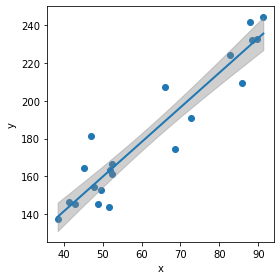

In [46]:
# Plot
plt.figure(figsize=(4, 4))
plt.scatter(x, y)
plt.plot(x_pred, y_pred, '-', linewidth=2)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.4)
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout()
plt.show()